**Summary**

We aim to answer the question on whether the weather is more volatile in Manchester than London. A subset of this is to first check if it rains more in Manchester.

The data is taken from the Met Office website, consists of several weather indicators and is a monthly time series. The two stations closest to London and Manchester are Heathrow and Ringway respectively. 

First, we want to get to know the data via descriptive statistics. We shall focus on the rainfall (mm) indicator.

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm
import warnings
warnings.filterwarnings('ignore')

* Read in the data as a csv files, denoting the na_values and separators

In [57]:
ringway = pd.read_csv('Ringway.csv', sep='[ ]{2,}', na_values = '---')
heathrow = pd.read_csv('Heathrow.csv', sep='[ ]{2,}', na_values = '---')
ringway.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1946,1,NaN,NaN,NaN,NaN,33.2
1,1946,2,NaN,NaN,NaN,NaN,58.2
2,1946,3,NaN,NaN,NaN,NaN,109.8
3,1946,4,NaN,NaN,NaN,NaN,136.3
4,1946,5,NaN,NaN,NaN,NaN,216.1


* Calculate the mean, variance and standard deviation
* Calculate median and mode
* Calculate quantiles
* Ignore na_values

In [58]:
print(f"Ringway rainfall has mean = {np.nanmean(ringway['rain'])}, variance = {ringway['rain'].var()} and standard deviation = {ringway['rain'].var()**0.5}")
print(f"Heathrow rainfall has mean = {np.nanmean(heathrow['rain'])} and variance = {heathrow['rain'].var()} and standard deviation = {heathrow['rain'].var()**0.5}")

Ringway rainfall has mean = 67.89296577946767, variance = 1174.9068266159695 and standard deviation = 34.276913901574765
Heathrow rainfall has mean = 50.57097505668935 and variance = 890.159542521511 and standard deviation = 29.835541599265646


In [59]:
print(f"The median of Ringway rainfall is {np.nanmedian(ringway['rain'])} while Heathrow's is {np.nanmedian(heathrow['rain'])}.")

The median of Ringway rainfall is 63.1 while Heathrow's is 46.8.


In [60]:
print(f"Ringway's rainfall mode is = {stats.mode(ringway['rain'])[0]}")
print(f"Heathrow's rainfall mode is = {stats.mode(heathrow['rain'])[0]}")

Ringway's rainfall mode is = [39.]
Heathrow's rainfall mode is = [26.]


In [61]:
print(np.nanquantile(ringway['rain'], q=[0.25, 0.75]))
print(np.nanquantile(heathrow['rain'], q=[0.25, 0.75]))

[44.075 86.9  ]
[27.85 68.8 ]


**Intepretation**
We can see the rainfall in Manchester has a higher mean, standard deviation, median, mode and quantile values. This suggests that it does rain more in Manchester than London, and we shall take this as our hypothesis.

Now, let us observe the histogram of our rainfall data for Manchester and London

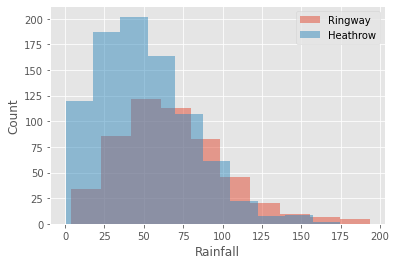

In [62]:
plt.style.use('ggplot')
plt.hist(ringway['rain'], alpha=0.5, label="Ringway")
plt.hist(heathrow['rain'], alpha=0.5, label="Heathrow")
plt.xlabel("Rainfall")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

* The two distributions are right skewed
* Heathrow's counts are higher as there has been more data recorded

In [63]:
print(len(ringway.index))
print(len(heathrow.index))

706
882


**Observing data from a time series point of view**

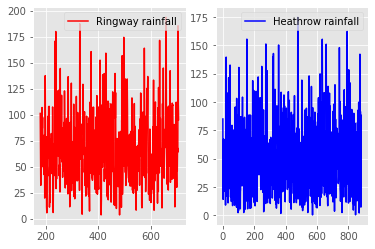

In [64]:
plt.subplot(1, 2, 1)
plt.plot(ringway['rain'], color="red", label="Ringway rainfall")
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(heathrow['rain'], color="blue", label="Heathrow rainfall")
plt.legend(loc='upper right')
plt.show()

**Interpretation**
The data seems to follow an ARCH/GARCH sort of model

Calculate acf for rainfall ignoring na_values

In [65]:
print(sm.acf(ringway["rain"], nlags = 3, missing = "drop"))
print(sm.acf(heathrow["rain"], nlags = 3, missing = "drop"))

[1.         0.0563346  0.03422985 0.00608034]
[ 1.          0.07042384  0.05047462 -0.01235316]


* Investigate relation between rainfall and hours of sun

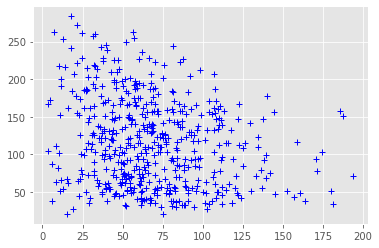

In [66]:
plt.plot(ringway['rain'], ringway['sun'], 'b+')
plt.show()

* Calculate the correlation (should be negative, which makes sence)

In [67]:
ringway['rain'].corr(ringway['sun'])

-0.22754335846002277